In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical

In [ ]:
home_data = pd.read_csv('/content/HomeTeam.csv')

home_data.describe()

,Unnamed: 0.1,Unnamed: 0,Outs,Balls,Strikes,Strike,RelSpeed,SpinRate,SpinAxis,RelHeight,...,VertApprAngle,HorzApprAngle,ExitSpeed,Angle,Direction,HitSpinRate,Distance,Bearing,HangTime,Game#
count,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,0.0,2941.000000,2941.000000,2940.000000,2941.000000,...,2941.000000,2941.000000,754.000000,754.000000,754.000000,496.000000,584.000000,584.000000,584.000000,2970.000000
mean,2988.294276,148.573737,0.938047,0.886195,0.841414,NaN,81.514111,2153.456052,169.637317,5.713783,...,-7.797227,-0.693369,78.797495,14.154220,8.259254,3328.222531,134.423165,0.136502,1.812413,10.705724
std,1785.597660,91.891065,0.813452,0.986868,0.820811,NaN,5.664683,277.232033,88.504151,0.384149,...,1.951850,1.948495,17.447576,27.996710,60.780446,1403.579387,123.638448,34.792869,1.903155,6.154155
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,67.593070,915.928447,0.002310,4.783690,...,-15.233040,-6.385278,17.309900,-76.298278,-178.082965,713.873536,1.989770,-152.877937,0.017052,1.000000
25%,1449.250000,69.250000,0.000000,0.000000,0.000000,NaN,76.655980,2057.295550,83.374384,5.438160,...,-9.242964,-2.139512,68.965418,-4.507595,-22.565562,2129.989356,11.540275,-21.391572,0.079570,5.000000
50%,2914.500000,147.000000,1.000000,1.000000,1.000000,NaN,81.131430,2180.984991,203.981502,5.653200,...,-7.663345,-0.854463,81.916570,14.173079,-1.100757,3295.542056,96.818290,-2.767237,0.963755,10.000000
75%,4588.750000,228.000000,2.000000,2.000000,2.000000,NaN,86.438190,2339.542642,224.547414,5.920520,...,-6.255278,0.607602,92.538517,33.528294,29.164002,4506.895180,251.106437,18.433737,3.485434,16.000000
max,6084.000000,345.000000,2.000000,3.000000,2.000000,NaN,94.097010,2785.918582,359.827330,6.998710,...,-1.763747,5.480164,111.485620,88.685877,179.148430,7330.559297,402.666400,176.868875,5.978975,21.000000


In [ ]:
# Display all unique entries in the 'Results' column
unique_results = home_data['Results'].unique()
print(unique_results)

['Ball' 'Fly Out' 'Foul' 'Called Strike' 'Swinging Strike' 'Error'
 'Ground Out' 'Line Out' 'HBP' 'Single' 'Pop Out' 'Home Run' 'Double' nan
 'Bunt' 'Triple']


In [ ]:
strike_conditions = [
    'Called Strike',
    'Swinging Strike',
    'Foul',
    'Error',
    'Fly Out',
    'Ground Out',
    'Line Out',
    'Pop Out',
    'Foul Tip',
    'Bunt',
]

# Create the 'strike' column
home_data['Strike'] = home_data['Results'].apply(lambda result: 1 if result in strike_conditions else 0)

# Verify the new column
print(home_data[['Results', 'Strike']].head())

   Results  Strike
0     Ball       0
1  Fly Out       1
2     Ball       0
3     Ball       0
4     Foul       1


Test Accuracy: 0.5397
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       383
           1       0.59      0.59      0.59       499

    accuracy                           0.54       882
   macro avg       0.53      0.53      0.53       882
weighted avg       0.54      0.54      0.54       882



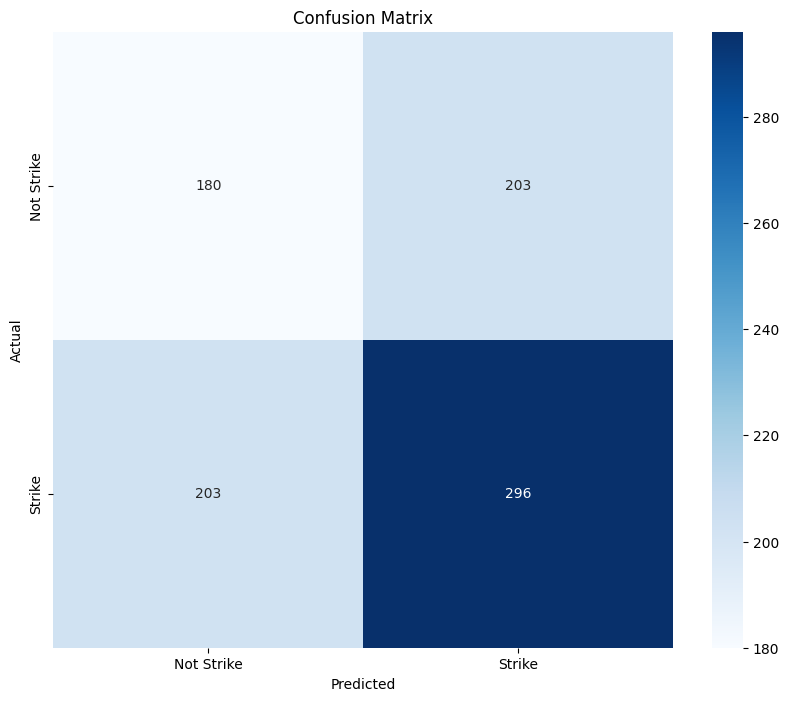

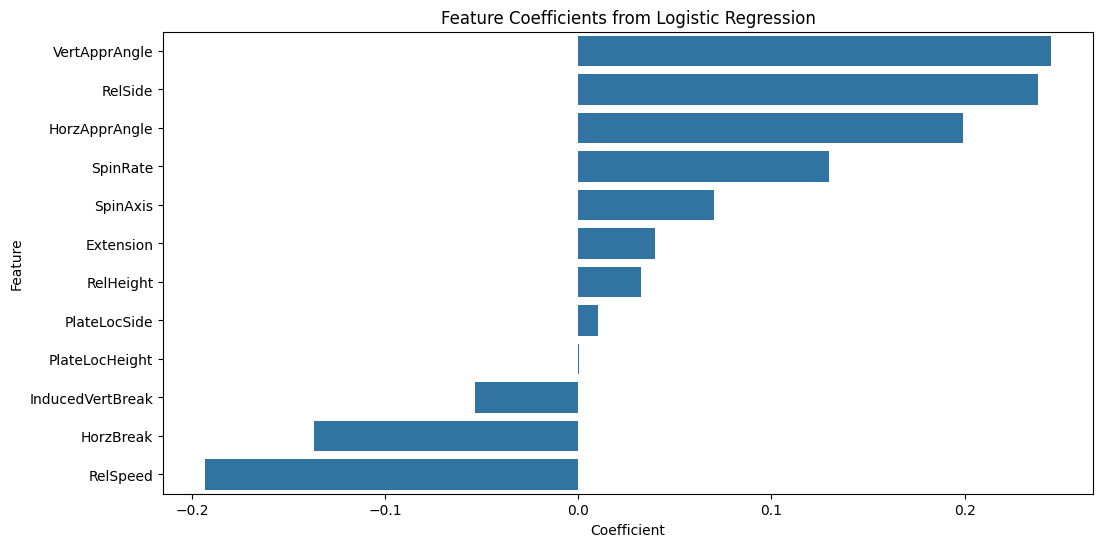

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
feature_columns = [
    'RelSpeed', 'SpinRate', 'SpinAxis', 'RelHeight', 'RelSide', 'Extension',
    'InducedVertBreak', 'HorzBreak', 'PlateLocHeight', 'PlateLocSide', 'VertApprAngle', 'HorzApprAngle'
]
target_column = 'Strike'

# Drop rows with missing values
home_data.dropna(subset=feature_columns + [target_column], inplace=True)

# Split features and target
X = home_data[feature_columns]
y = home_data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
logreg_model = LogisticRegression(class_weight='balanced', random_state=21, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Strike', 'Strike'], yticklabels=['Not Strike', 'Strike'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display coefficients
coefficients = logreg_model.coef_[0]
coef_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Coefficients from Logistic Regression')
plt.show()